### Krill Growth Model (Atkinson et al 2006)

#### This empirical model derives a Daily Growth Rate (DGR, mm $d^{-1}$) from a starting length of an individual krill, chlorophyll concentration, and SST:

$DGR = a + b * Length + c * Length^2 + [d * \frac{CHL}{e + CHL}] + f * SST + g * SST ^2$

- Length (L mm) = Proxy for growth =  using 40mm as the starting value (observed mean length of adult krill)
- SST (°C) = Proxy for survival =  threshold between -1 to 5°C
- Chl-a (mg m$^{-3}$) = Proxy for food availability - threshold: 0.5 mg m-3

Murphy et al 2017:
<blockquote> Sensitivity of the empirical model: Optimum growth rates vary with animal size, but occur generally between temperatures -1 to 2 o C and chlorophyll a concentrations > 1.0 mg m-3  (Figure S3). For chlorophyll a concentrations >1.0 mg m$^{-3}$ there is little change in the potential rate of growth, but the model is particularly sensitive to the change in chlorophyll a concentration from < 0.1 mg m$^{-3}$ to > 1 mg chl a m$^{-3}$ (Figure S34 ). Above ~1°C growth rates decline and this is particularly rapid above ~2°C and also below ~ -1°C. </blockquote>

___
### Objective: estimate the growth potential for each 1° by 1° latitude-longitude grid cell for each month (mm month−1)
Murphy et al: estimated potential growth from satelitte data

From Murphy et al 2017: used Atkinson et al. 2006; Model 3; see their Table 5
<blockquote> Growth potential was calculated in two ways. In the first we calculated growth rates for each month only for months and cells where both SST and chlorophyll a values were present. In the second calculation for the months and locations where SST data were available but chlorophyll data were missing, we assumed the chlorophyll a concentration was 0.0 mg m−3 . Area-weighted mean growth rates were derived to generate summary estimates of circumpolar mean monthly growth rates (September to April; May to August were excluded because of extensive missing data due to cloud and sea ice cover). </blockquote>

Devi et al: Evaluated projected changes in krill habitat between the recent past (1960-1989) and end of the century (2070-2099).

* simulated growth potential as a measure of habitat quality
* growth potential method from murphy et al 
* Habitat area = the surface area of grid cells where growth potential was positive
* all growth potential calculations were done using seasonal climatologies yeilding seasonal GP AND YET:
* For each day in the season, DGR was calculated using the SST and chlorophyll fields, and then added to the previous length.

From Devi: 
<blockquote> if SST was present and chlorophyll was absent, then chlorophyll was set to 0 mg m-3 , whereas if there was sea ice cover the cell was excluded from the calculation. </blockquote>

<blockquote>Although previous analyses have included other starting size classes, we found that projected differences between future and historical epochs remained the same irrespective of starting length. For each day in the season, DGR was calculated using the SST and chlorophyll fields, and then added to the previous length</blockquote>

In [1]:
#Import Modules
import os

import math
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import exp
%matplotlib inline

In [4]:
# specify coefs
a = -0.066 # Constant - all krill combined (no life stage or sex)
b = 0.002 # Linear term relating to length
c = -0.000061 # Quadratic term relating to length
d = 0.385 # Maximum term relating to food
e = 0.328 # Half Saturation constant relating to food
f = 0.0078 # Linear term relating to temperature
g = -0.0101 # Quadratic term relating to temperature

In [39]:
#test conditions
temp = [-2,-1, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1, 1.5, 2, 2.5, 3, 4, 5, 6]
#food = [0, 0.25, 0.5, 0.75, 1, 1.5, 2, 2.5, 3]
#food = [0, 0.06, 0.07, 0.1, 0.22, 0.38, 0.5, 0.7, 1, 1.3, 1.5, 1.78, 2, 3, 4, 5] 
food = [0, 0.04, 0.07, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 1, 1.3, 1.5, 1.78, 2, 3] 

long = [10, 15, 20, 25, 27.5, 30, 32.5, 35, 37.5, 40, 42.5, 45, 47.5, 50, 55, 60]
# intialise data of lists. 
data = {'SST': temp, 's': "",
        'CHL': food,'c': "",
        'L_i': long, 'l': ""} 
# Create DataFrame 
df = pd.DataFrame(data) 
# Calculate Tests on the data frame
df['s'] = np.round((f * df.SST + g * df.SST**2), 3)
df['c'] = np.round((d * df.CHL / (e + df.CHL)), 3)
df['l'] = np.round ((a + (b * df.L_i) + (c * df.L_i**2)), 3)
# Print the output. 
print('Example conditions and their resulting terms within the DGR Function:')
df.head()

Example conditions and their resulting terms within the DGR Function:


,SST,s,CHL,c,L_i,l
0,-2.00,-0.056,0.00,0.000,10.0,-0.052
1,-1.00,-0.018,0.04,0.042,15.0,-0.050
2,-0.50,-0.006,0.07,0.068,20.0,-0.050
3,-0.25,-0.003,0.10,0.090,25.0,-0.054
4,0.00,0.000,0.20,0.146,27.5,-0.057


In [41]:
df

,SST,s,CHL,c,L_i,l
0,-2.00,-0.056,0.00,0.000,10.0,-0.052
1,-1.00,-0.018,0.04,0.042,15.0,-0.050
2,-0.50,-0.006,0.07,0.068,20.0,-0.050
3,-0.25,-0.003,0.10,0.090,25.0,-0.054
4,0.00,0.000,0.20,0.146,27.5,-0.057
5,0.25,0.001,0.30,0.184,30.0,-0.061
6,0.50,0.001,0.40,0.212,32.5,-0.065
7,0.75,0.000,0.50,0.232,35.0,-0.071
8,1.00,-0.002,0.60,0.249,37.5,-0.077
9,1.50,-0.011,0.70,0.262,40.0,-0.084


In [9]:
from matplotlib import style
style.use('ggplot')

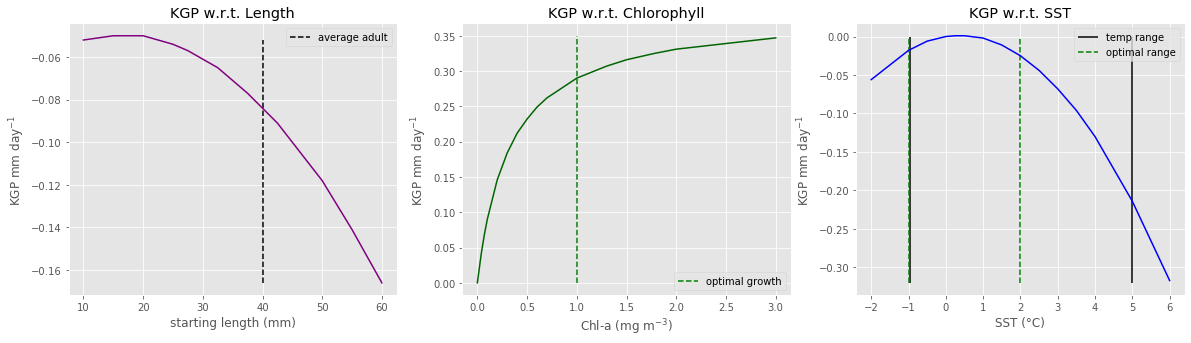

In [37]:
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(131)
ax1.set_title('KGP w.r.t. Length')
ax1.plot(df.L_i, df.l, color ='purple')
ax1.vlines(40, -0.166, -0.052 , color='black', linestyle = 'dashed', label = 'average adult')
plt.xlabel("starting length (mm)")
plt.ylabel("KGP mm day$^{-1}$")
plt.legend()
plt.gca();

ax2 = fig.add_subplot(132)
ax2.set_title('KGP w.r.t. Chlorophyll')
ax2.plot(df.CHL, df.c, color = 'darkgreen')
#ax2.vlines(0.5, 0, .35, color='red', linestyle = 'dashed', label = 'growth threshold')
ax2.vlines(1, 0, .35, color='green', linestyle = 'dashed', label = 'optimal growth')
plt.xlabel("Chl-a (mg m$^{-3}$)")
plt.ylabel("KGP mm day$^{-1}$")
plt.legend(loc = 'lower right')
plt.gca()

ax3 = fig.add_subplot(133)
ax3.set_title('KGP w.r.t. SST')
ax3.plot(df.SST, df.s, '-b')
ax3.vlines([-0.95,5], -0.32, 0 , color='black', linestyle = 'solid', label = 'temp range')
ax3.vlines([-1,2], -0.32, 0 , color='green', linestyle = 'dashed', label = 'optimal range')
plt.legend()
plt.xlabel("SST (°C)")
plt.ylabel("KGP mm day$^{-1}$")
plt.gca()

plt.savefig('KGP with respect to terms.png')

### Single Plots

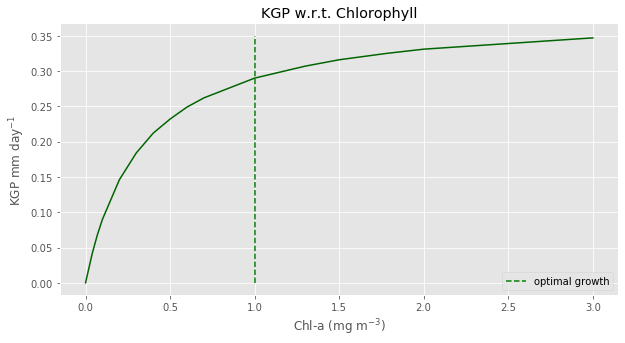

In [35]:
fig = plt.figure(figsize=(10,5))

ax2 = fig.add_subplot(111)
ax2.set_title('KGP w.r.t. Chlorophyll')
ax2.plot(df.CHL, df.c, color = 'darkgreen')
ax2.vlines(1, 0, .35, color='green', linestyle = 'dashed', label = 'optimal growth')
plt.xlabel("Chl-a (mg m$^{-3}$)")
plt.ylabel("KGP mm day$^{-1}$")
plt.legend(loc = 'lower right')
plt.gca()

plt.savefig('figures/KGP with respect to chl.png')

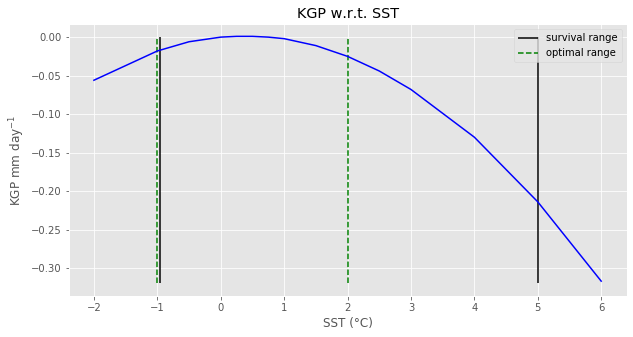

In [40]:
fig = plt.figure(figsize=(10,5))

ax3 = fig.add_subplot(111)
ax3.set_title('KGP w.r.t. SST')
ax3.plot(df.SST, df.s, '-b')
ax3.vlines([-0.95,5], -0.32, 0 , color='black', linestyle = 'solid', label = 'survival range')
ax3.vlines([-1,2], -0.32, 0 , color='green', linestyle = 'dashed', label = 'optimal range')                             
plt.legend()
plt.xlabel("SST (°C)")
plt.ylabel("KGP mm day$^{-1}$")
plt.gca()

plt.savefig('figures/KGP with respect to sst.png')

In [6]:
#test conditions
length = 40
sst = 1
chl = 1

#DGR Expression
length_term = a + (b * length) + (c * length**2)
chl_term = d * (chl / e + chl)
sst_term = f * sst + g * sst**2
print('length term:', np.round(length_term, 3)) 
print('chl term:', np.round(chl_term, 3))
print('sst term:', np.round(sst_term, 3))

DGR = length_term + chl_term + sst_term
print('DGR Test Case:', np.round(DGR,2))

length term: -0.084
chl term: 1.559
sst term: -0.002
DGR Test Case: 1.47


___
### Goal: 
#### evaluate the function to calculate KGP in the same dimensions of an ensemble member:


In [82]:
def compute_kgp(ds, length):
    """Compute Krill Growth Potential 
    
    Natural growth rates in Antarctic krill (Euphausia superba): II. Predictive 
    models based on food, temperature, body length, sex, and maturity 
    stage doi: 10.4319/lo.2006.51.2.0973 
    A Atkinson, RS Shreeve, AG Hirst, P Rothery, GA Tarling 
    Limnol Oceanogr, 2006 
    
    Oceanic circumpolar habitats of Antarctic krill 
    doi: 10.3354/meps07498 
    A Atkinson, V Siegel, EA Pakhomov, P Rothery, V Loeb 
    Mar Ecol Prog Ser, 2008
    
    """
    
    # specify coefs
    a = -0.066
    b = 0.002
    c = -0.000061
    d = 0.385
    e = 0.328
    f = 0.0078
    g = -0.0101
    
    # local pointers
    sst = ds.SST
    chl = ds.Chl_surf
        
    # compute terms and sum
    length_term = a + (b * length) + (c * length**2)
    chl_term = d * chl / (e + chl)    
    sst_term = f * sst + g * sst**2    
    kgp = length_term + chl_term + sst_term
   
    ds['KGP'] = kgp
    return ds

In [134]:
def test_compute(ds, length):
    """Compute Krill Growth Potential 
    doi: 10.3354/meps07498 
    EQUATION:
    a + (b*L) + (c*L^2) + (d*C/(e+C)) + (f*S) + (g*S^2)
    
    """
    # specify coefs
    a = -0.066
    b = 0.002
    c = -0.000061
    d = 0.385
    e = 0.328
    f = 0.0078
    g = -0.0101
    
    # parameter s.e.
    ae = 0.165
    be = 0.0066
    ce = -0.000077
    de = 0.091
    ee = 0.246
    fe = 0.017
    ge = -0.00045
    
    # local pointers
    sst = ds.SST
    chl = ds.Chl_surf
        
    # compute terms and sum
    length_term = a + (b * length) + (c * length**2)
    chl_term = (d * (chl / (e + chl)))    
    sst_term = (f * sst) + (g * sst**2)    
    #error = ae + be + ce + de + ee + fe + ge
    bad_idea = (.21 - .15)
    
    kgp = length_term + chl_term + sst_term + bad_idea #+ error
    
    ds['KGP'] = kgp
    return ds

### Test Equations Based on Table S4 Murphy 2017:
Estimated growth rate of 40 mm krill for the mean parameterisation and for ± 1 s.e (Table S3). 
Values were estimated at SST of 0.5o C and a chlorophyll concentration of 0.5 mg m-3 :

DGR = 0.21 mm d$^{-1}$

-1 s.e. = -0.12

+1 s.e. = 0.53

In [135]:
# Make Fake Data with Controls:
data = {'SST': np.linspace(.5, .5, 1),
        'Chl_surf': np.linspace(.5, .5, 1) } 

# Create DataFrames 
murphy = pd.DataFrame(data)

kgp_murphy = compute_kgp(murphy, 40)
print('current equation DGR @ .5:', kgp_murphy.KGP)

kgp_murphy2 = test_compute(murphy, 40)
print('updated equation DGR @ .5:', kgp_murphy2.KGP)


kgp_murphy20 = test_compute(murphy, 20)
print('updated equation DGR @ .5:', kgp_murphy20.KGP)
kgp_murphy60 = test_compute(murphy, 60)
print('updated equation DGR @ .5:', kgp_murphy60.KGP)


current equation DGR @ .5: 0    0.150263
Name: KGP, dtype: float64
updated equation DGR @ .5: 0    0.210263
Name: KGP, dtype: float64
updated equation DGR @ .5: 0    0.243463
Name: KGP, dtype: float64
updated equation DGR @ .5: 0    0.128263
Name: KGP, dtype: float64


## Test it again with 1's instead of .5 to check where things are going wrong

In [136]:
# Make Fake Data with Controls:
data2 = {'SST': np.linspace(1, 1, 1),
        'Chl_surf': np.linspace(1, 1, 1) } 

# Create DataFrames 
murphy1 = pd.DataFrame(data2)

kgp_murphy3 = compute_kgp(murphy1, 40)
print('current equation DGR @ 1:', kgp_murphy3.KGP)

kgp_murphy4 = test_compute(murphy1, 40)
print('updated equation DGR @ 1:', kgp_murphy4.KGP)

current equation DGR @ 1: 0    0.20401
Name: KGP, dtype: float64
updated equation DGR @ 1: 0    0.26401
Name: KGP, dtype: float64



___
## Make Hypothetical Datasets to test:
krill length = 40 
1. KGP wrt SST **constant chl** @ 1 mg; sst varies between -1 and 5
2. KGP wrt Chl **constant sst** @ 1°C; chl varies between 0 and 5 mg

In [137]:
# Make Fake Data with Controls:
data_sst = {'SST': np.linspace(-1, 5, 50),
        'Chl_surf': np.linspace(.5, .5, 50) } 

data_chl = {'SST': np.linspace(.5, .5, 50),
        'Chl_surf': np.linspace(0, 5, 50) } 

# Create DataFrames 
const_sst = pd.DataFrame(data_sst)
const_chl = pd.DataFrame(data_chl)
#df_b.head()

#### Compute KGP wrt both vars and both computations:

In [138]:
kgp_chl = compute_kgp(const_chl, 40)

kgp_sst = compute_kgp(const_sst, 40)


In [139]:
# Make Fake Data with Controls:
data_sst2 = {'SST': np.linspace(-1, 5, 50),
        'Chl_surf': np.linspace(.5, .5, 50) } 

data_chl2 = {'SST': np.linspace(.5, .5, 50),
        'Chl_surf': np.linspace(0, 5, 50) } 

# Create DataFrames 
const_sst2 = pd.DataFrame(data_sst2)
const_chl2 = pd.DataFrame(data_chl2)
#df_b.head()

In [140]:
kgp_chl_test = test_compute(const_chl2, 40)
kgp_sst_test = test_compute(const_sst2, 40)

## Visualize the differences:

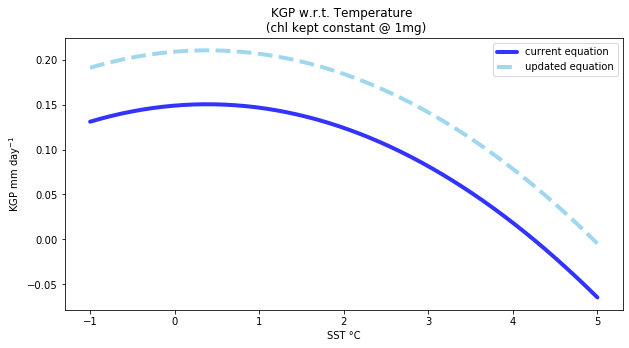

In [141]:
fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(111)
ax.set_title('KGP w.r.t. Temperature \n (chl kept constant @ 1mg)')

ax.plot(kgp_sst.SST, kgp_sst.KGP, color = 'blue',
         alpha = .8, linewidth = 4,
         solid_capstyle='round', label = 'current equation')

ax.plot(kgp_sst_test.SST, kgp_sst_test.KGP, color = 'skyblue',
         alpha = .8, linewidth = 4, linestyle = 'dashed',
         solid_capstyle='round', label = 'updated equation')

plt.xlabel("SST °C")
plt.ylabel("KGP mm day$^{-1}$")
plt.legend()
plt.gca()

#plt.savefig('figures/KGP with respect to chl.png')

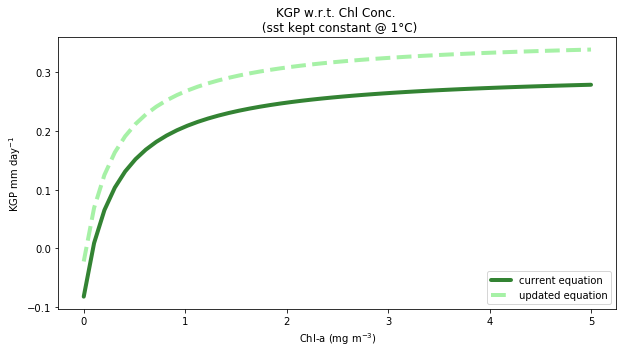

In [142]:
fig = plt.figure(figsize=(10,5))

ax2 = fig.add_subplot(111)
ax2.set_title('KGP w.r.t. Chl Conc. \n (sst kept constant @ 1°C)')
ax2.plot(kgp_chl.Chl_surf, kgp_chl.KGP, color = 'darkgreen',
         alpha = .8, linewidth = 4, 
         solid_capstyle='round', label = 'current equation')

ax2.plot(kgp_chl_test.Chl_surf, kgp_chl_test.KGP, color = 'lightgreen',
         alpha = .8, linewidth = 4, linestyle = 'dashed',
         solid_capstyle='round', label = 'updated equation')

#plt.xlabel("SST °C")
plt.xlabel("Chl-a (mg m$^{-3}$)")
plt.ylabel("KGP mm day$^{-1}$")
plt.legend(loc = 'lower right')
plt.gca()

#plt.savefig('figures/KGP with respect to chl.png')

In [39]:
def compute_kgp_test2(ds, length):
    """Compute Krill Growth Potential 
    doi: 10.3354/meps07498 
    """
    # specify coefs
    a = -0.066
    b = 0.002
    c = -0.000061
    d = 0.385
    e = 0.328
    f = 0.0078
    g = -0.0101
    
    # parameter s.e.
    ae = 0.165
    be = 0.0066
    ce = -0.000077
    de = 0.091
    ee = 0.246
    fe = 0.017
    ge = -0.00045
    
    # local pointers
    sst = ds.SST
    chl = ds.Chl_surf
        
    # compute terms and sum
    length_term = a + b * length + c * length**2
    chl_term = d * (chl / (e + chl))    
    sst_term = f * sst + g * sst**2    
    kgp = length_term + chl_term + sst_term
    kgp.name = 'KGP'
   
    ds['KGP'] = kgp
    return ds

In [34]:
# Murphy Test

current equation DGR @ .5: 0    0.155313
Name: KGP, dtype: float64
updated equation DGR @ .5: 0    0.150263
Name: KGP, dtype: float64
current equation DGR @ 1: 0    0.22421
Name: KGP, dtype: float64
updated equation DGR @ 1: 0    0.20401
Name: KGP, dtype: float64


,SST,Chl_surf
0,1.0,1.0


In [37]:
kgp_murphy = compute_kgp(murphy, 40)
kgp_murphy

,SST,Chl_surf,KGP
0,0.5,0.5,0.155313


In [38]:
kgp_murphy2 = compute_kgp_test(murphy, 40)
kgp_murphy2

,SST,Chl_surf,KGP
0,0.5,0.5,0.150263
